### Part 3: Watts-Strogatz Networks

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 

Graph:  1
Average shortest path length:  62.875751503006015
Graph:  2
Average shortest path length:  8.04763126252505
Graph:  3
Average shortest path length:  4.764448897795591


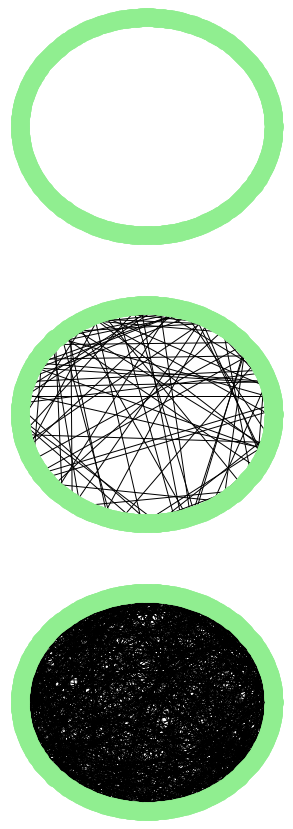

In [43]:
G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

graphs = [G1, G2, G3]

f,axs = plt.subplots(3,1,figsize=(5,15))

for count, graph in enumerate(graphs):
    print("Graph: ", count + 1)
    nx.draw_shell(graph, ax=axs[count], node_color='lightgreen', label = 'test')
    print("Average shortest path length: ", nx.average_shortest_path_length(graph))

plt.show()


**Describe what happens to the network when $p = 1$**

Each random long-range link can significantly decrease the average shortest path of a Watts-Strogatz network. When the percentage is 1 in a Watts-Strogatz graph the probability of each node being connected with a random node instead of each node being connected with their k nearist neighbours is 100%. Therefore the average shortest path is as small as can be when the percentage is 1. 


Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

In [44]:
#percentages for graphs
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

average_paths = []
av_sp_by_p = []
stdevs_by_p = []

#Create 50 Watts-Strogatz Networks and calculate standard deviation and average shortest path by each percentage
for x in p:
    average_paths = []
    for y in range(50):
        G = nx.watts_strogatz_graph(500, 4, x)
        sp = nx.average_shortest_path_length(G)
        average_paths.append(sp)

    av_sp_by_p.append(np.average(average_paths))
    stdevs_by_p.append(np.std(average_paths))

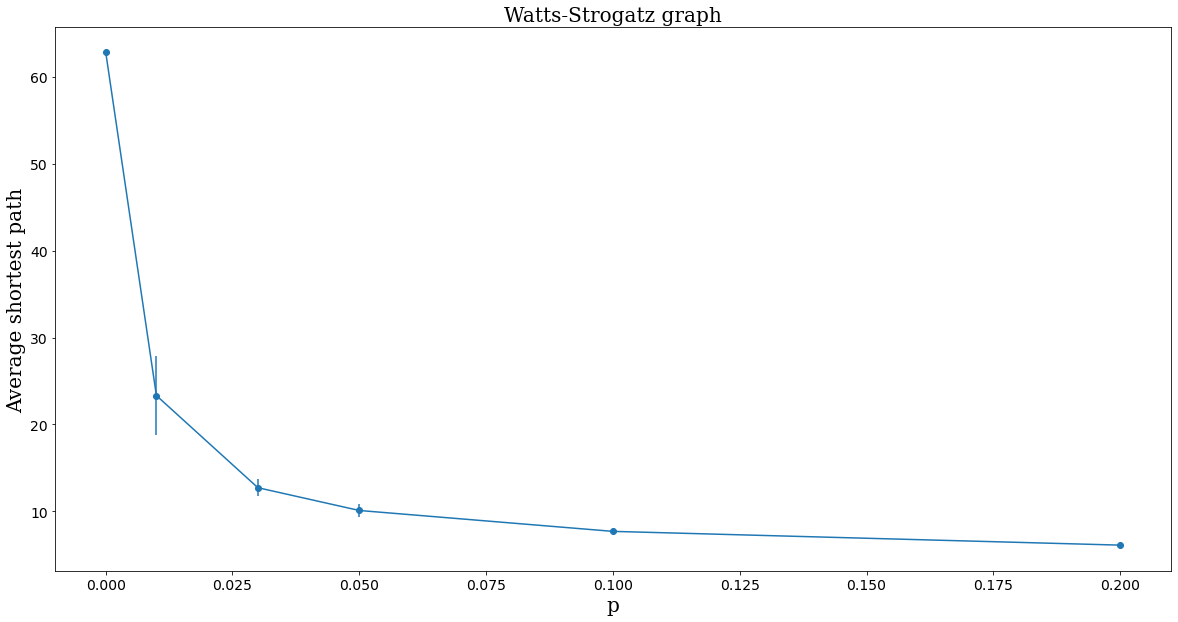

In [45]:
font = {'family':'serif','color':'black','size':20}

plt.figure(figsize=(20,10))

# plotting the points where the x axis is p and the y axis is the average shortest path.
plt.errorbar(p, av_sp_by_p, yerr=stdevs_by_p, linestyle = '-', marker='o')


# naming the x axis
plt.xlabel('p', fontdict = font)
plt.xticks(fontsize=14)

# naming the y axis
plt.ylabel('Average shortest path', fontdict = font)
plt.yticks(fontsize=14)
 
# graph title
plt.title('Watts-Strogatz graph', fontdict = font)
 

plt.show()